This calculator is useful to determine the amount of minimum detectable effect you can achieve based on:


1. Alpha
2. Beta
3. Your population
4. Your (primary AB testing metric) conversion rate

How? based on the population you can calculate your MDE properly. **I used a z-test approach to calculate this.** But I think it works nice at other statiscal tests methods.

Remember: the more traffic your test gets, the less MDE you will need. To show how it works I recreated a visualization (10 weeks maximum).


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from IPython.display import display  #this is for colab
import matplotlib.pyplot as plt

# Two-Tailed Hypothesis

Warning: you should this calculator if you are running two-sided experiments. If not, try to use the one-tailed hypothesis calculator below.



In [2]:
#Design of the experiment
alpha = 0.05 #statistical significance (0,.05 recommended)
beta  = 0.20 #statistical power (0,20 recommended)
cr   = 0.20 #conversion rate. It's not the CR from whole website. It's related to your primary metric.
traffic = 8000 #weekly traffic that visits your pafe, not your whole webiste
split = 0.5 #AB tests are 50-50
n = traffic * split #we create both groups (A & B). If you are running an ABC test you should change split by 0.32

#Z-score & standard error calculation
z_alpha = norm.ppf(1 - alpha/2)   #calculates 1.96 (two-tailed) if 0.05 selected at alpha.
z_beta  = norm.ppf(1 - beta)      #calculates 0.84 if 0.20 selected at beta
se = np.sqrt(2 * cr * (1 - cr) / n) #standard error for difference of two equal-sized proportion samples

# Minimum Detectable Effect
value = (z_alpha + z_beta) * se
mde = value * 100

print("Two-tailed MDE:", mde)

Two-tailed MDE: 2.505813996983669


In [3]:
#We create the table with all of the mde values
mde_values = []
max_weeks = 10
for week in range(1, max_weeks + 1):
    n_per_variant = traffic * split * week
    se  = np.sqrt(2 * cr * (1 - cr) / n_per_variant)
    mde = (z_alpha + z_beta) * se
    mde_values.append({
        "Week": week,
        "Total Sample Size": int(traffic * week),
        "Per Variant": int(n_per_variant),
        "MDE (prop)": round(mde, 4),
        "MDE (pp)":   round(mde * 100, 2),
    })

df = pd.DataFrame(mde_values) #here we create de dataframe using all of the mde values
print(df)

   Week  Total Sample Size  Per Variant  MDE (prop)  MDE (pp)
0     1               8000         4000      0.0251      2.51
1     2              16000         8000      0.0177      1.77
2     3              24000        12000      0.0145      1.45
3     4              32000        16000      0.0125      1.25
4     5              40000        20000      0.0112      1.12
5     6              48000        24000      0.0102      1.02
6     7              56000        28000      0.0095      0.95
7     8              64000        32000      0.0089      0.89
8     9              72000        36000      0.0084      0.84
9    10              80000        40000      0.0079      0.79


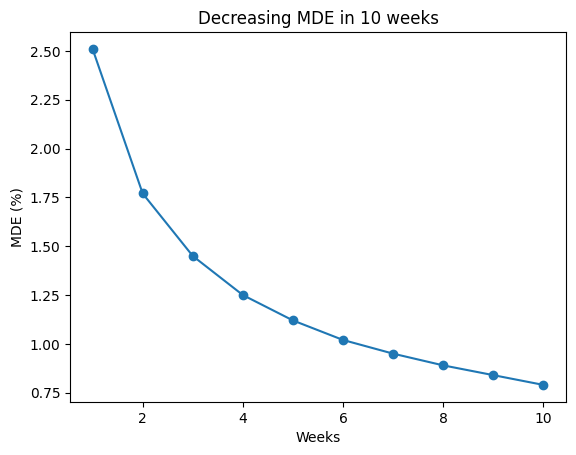

In [4]:
#Visualization
plt.figure()
plt.plot(df["Week"], df["MDE (pp)"], marker='o')
plt.xlabel("Weeks")
plt.ylabel("MDE (%)")
plt.title("Decreasing MDE in 10 weeks")
plt.show()

# One-Tailed Hypothesis

Warning: you should this calculator if you are running one-sided experiments. If not, try to use the two-tailed hypothesis calculator above.

In [5]:
#Design of the experiment
alpha = 0.05 #statistical significance (0,.05 recommended)
beta  = 0.20 #statistical power (0,20 recommended)
cr   = 0.20 #conversion rate. It's not the CR from whole website. It's related to your primary metric.
traffic = 8000 #weekly traffic that visits your pafe, not your whole webiste
split = 0.5 #AB tests are 50-50
n = traffic * split #we create both groups (A & B). If you are running an ABC test you should change split by 0.32

#Z-score & standard error calculation
z_alpha = norm.ppf(1 - alpha)   #calculates 1.645 (one-tailed) if 0.05 selected at alpha.
z_beta  = norm.ppf(1 - beta)      #calculates 0.84 if 0.20 selected at beta
se = np.sqrt(2 * cr * (1 - cr) / n) #standard error for difference of two equal-sized proportion samples

# Minimum Detectable Effect
value = (z_alpha + z_beta) * se
mde = value * 100

print("One-tailed MDE:", mde)

One-tailed MDE: 2.2239707249907346


In [6]:
#We create the table with all of the mde values
mde_values = []
max_weeks = 10
for week in range(1, max_weeks + 1):
    n_per_variant = traffic * split * week
    se  = np.sqrt(2 * cr * (1 - cr) / n_per_variant)
    mde = (z_alpha + z_beta) * se
    mde_values.append({
        "Week": week,
        "Total Sample Size": int(traffic * week),
        "Per Variant": int(n_per_variant),
        "MDE (prop)": round(mde, 4),
        "MDE (pp)":   round(mde * 100, 2),
    })

df = pd.DataFrame(mde_values) #here we create de dataframe using all of the mde values
print(df)

   Week  Total Sample Size  Per Variant  MDE (prop)  MDE (pp)
0     1               8000         4000      0.0222      2.22
1     2              16000         8000      0.0157      1.57
2     3              24000        12000      0.0128      1.28
3     4              32000        16000      0.0111      1.11
4     5              40000        20000      0.0099      0.99
5     6              48000        24000      0.0091      0.91
6     7              56000        28000      0.0084      0.84
7     8              64000        32000      0.0079      0.79
8     9              72000        36000      0.0074      0.74
9    10              80000        40000      0.0070      0.70


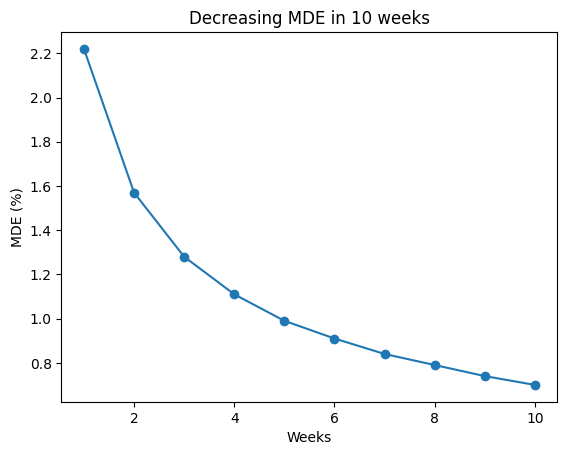

In [7]:
#Visualization
plt.figure()
plt.plot(df["Week"], df["MDE (pp)"], marker='o')
plt.xlabel("Weeks")
plt.ylabel("MDE (%)")
plt.title("Decreasing MDE in 10 weeks")
plt.show()